Training the model using our dataset

In [14]:
import pandas as pd
import re as re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Necessary Functions

# Filtering the text 
def word_edit(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('\\W'," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"

def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(word_edit)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_LR=LR.predict(new_xv_test)
    return print("\n\nLR Prediction: {}".format(output_label(pred_LR[0])))



data_fake = pd.read_csv('./DataSet/Fake.csv', encoding='ISO-8859-1')
data_true = pd.read_csv( './DataSet/True.csv', encoding='ISO-8859-1')
data_additional_1 = pd.read_csv( './DataSet/Thenews.csv', encoding='ISO-8859-1')
data_additional_2 = pd.read_csv( './DataSet/news_articles.csv', encoding='ISO-8859-1')
data_additional_3 = pd.read_csv( './DataSet/news.csv', encoding='ISO-8859-1')
data_part_6 = pd.read_csv( './DataSet/poynter_data.csv', encoding='ISO-8859-1')


data_part_1=data_fake.drop(['title','subject','date'],axis=1)
data_part_2=data_true.drop(['title','subject','date'],axis=1)
data_part_3=data_additional_1.drop(['title','id'],axis=1)
data_part_4=data_additional_2.drop(['author','published','title','language','main_img_url',	'type',	'title_without_stopwords','text_without_stopwords','hasImage'],axis=1)
data_part_5=data_additional_3.drop(['title','id'],axis=1)


data = pd.concat([data_part_1,data_part_2,data_part_3,data_part_4,data_part_5,data_part_6], ignore_index=True)
data['class'] = data['label'].map({'Fake': 0, 'Real': 1})


data = data.dropna(subset=['text', 'class'])

x = data['text']
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02)


vectorization = TfidfVectorizer()
x_vector_train = vectorization.fit_transform(x_train)
x_vector_test = vectorization.transform(x_test)

LR = LogisticRegression()
LR.fit(x_vector_train, y_train)


model_prediction = LR.predict(x_vector_test)
accuracy = LR.score(x_vector_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, model_prediction))


C:\Users\Dell Inc\AppData\Local\Temp\ipykernel_14036\1554608060.py:40: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fake = pd.read_csv('./DataSet/Fake.csv', encoding='ISO-8859-1')
C:\Users\Dell Inc\AppData\Local\Temp\ipykernel_14036\1554608060.py:42: DtypeWarning: Columns (88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=Fa

Accuracy: 0.9647147147147147
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       754
         1.0       0.97      0.95      0.96       578

    accuracy                           0.96      1332
   macro avg       0.96      0.96      0.96      1332
weighted avg       0.96      0.96      0.96      1332



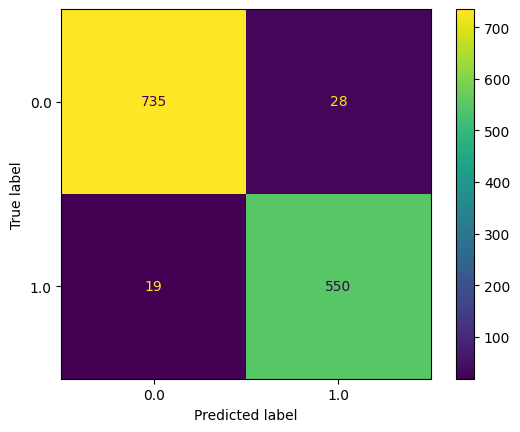

In [15]:
cm=confusion_matrix(model_prediction,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=LR.classes_)
disp.plot()


To test the model with your own news

In [25]:
news=str(input())
manual_testing(news)



LR Prediction: Fake News
